In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
df_pesticides = pd.read_csv('./data/FAOSTAT_data_pesticide.csv')
df_pesticides['Year']

0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
24    2014
25    2015
26    2016
27    2017
28    2018
29    2019
30    2020
Name: Year, dtype: int64

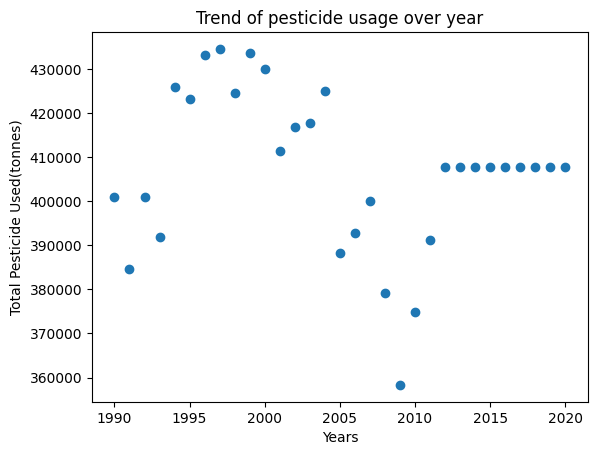

In [3]:
# pesticides in tonnes
plt.title("Trend of pesticide usage over year")
plt.xlabel("Years")
plt.ylabel("Total Pesticide Used(tonnes)")
plt.scatter(df_pesticides['Year'],df_pesticides['Value'])
plt.savefig('pesticide_used_years.png')
plt.show()

In [4]:
pickle_path = "./data/processed/pesticidesVStime.pkl"

df_pesticides_overall = pd.DataFrame({
    'year': df_pesticides['Year'], 
    'total_pesticides': df_pesticides['Value']
})

with open(pickle_path, "wb") as pfile:
    pickle.dump(df_pesticides_overall, pfile)
    pickle.dump({'Unit': 'tonnes'}, pfile)

df_pesticides_overall

,year,total_pesticides
0,1990,400975.93
1,1991,384646.39
2,1992,400975.90
3,1993,391903.86
4,1994,425922.68
5,1995,423201.53
6,1996,433180.36
7,1997,434540.76
8,1998,424562.11
9,1999,433633.96


In [5]:
interpolated_years = []
interpolated_pesticide_usage = []

for eachYear in range(1961,1990):
    interpolated_years.append(eachYear)
    interpolated_pesticide_usage.append(np.nan)

pickle_path = "./data/processed/pesticidesVStime.pkl"

all_years = np.concatenate((np.array(interpolated_years), np.array(df_pesticides['Year'])), axis=0)
all_values = np.concatenate((np.array(interpolated_pesticide_usage), np.array(df_pesticides['Value'])), axis=0)

df_pesticides_overall = pd.DataFrame({
    'year': all_years,
    'total_pesticides': all_values
})

# with open(pickle_path, "wb") as pfile:
#     pickle.dump(df_pesticides_overall, pfile)
#     pickle.dump({'Unit': 'tonnes'}, pfile)

df_pesticides_overall

,year,total_pesticides
0,1961,NaN
1,1962,NaN
2,1963,NaN
3,1964,NaN
4,1965,NaN
5,1966,NaN
6,1967,NaN
7,1968,NaN
8,1969,NaN
9,1970,NaN


In [6]:
# df_pesticides_overall.total_pesticides=df_pesticides_overall.total_pesticides.interpolate(method='spline', order=2)

# df_pesticides_overall

# print(df_pesticides_overall.interpolate(method='polynomial', order=2))
# df_pesticides_overall.interpolate(method ='polynomial', limit_direction ='backward', order=3, limit=10)
df_pesticides_overall = df_pesticides_overall.interpolate(method ='linear', limit_direction ='both', order=1)


In [7]:
with open(pickle_path, "wb") as pfile:
    pickle.dump(df_pesticides_overall, pfile)
    pickle.dump({'Unit': 'tonnes'}, pfile)